<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 6 - Clusterización con K-Means


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Implementando K-Means sobre Iris Dataset

---

**Tu tarea:** Implementa una función ***Kmeans($x_1$, $x_2$, $k$, $dist$, $max_iter$)***  que implemente el algoritmo de clusterización K-Means sobre la primera y segunda variable del dataset Iris Setosa (el de las flores ✿). En la celda de abajo se te proporciona una versión inicial del método a implementar, donde las variables de entrada ya son estandarizadas (importante cuando trabajamos con distancias),  y donde se visualizan las posiciones de los centroides inicializados aleatoriamente (en este caso no se utiliza el método Kmeans++, que sería lo óptimo, cosa que puedes hacer como ***bonus***). 

En la función implementada, se repetirán tantas iteraciones de la actualización de la posición de los centroides como indique el parámetro $max_iters$. Implementaciones más avanzadas utilizarían métodos que comprueben si el algoritmo ha convergido para decidir si dejar de iterar. Esto no es necesario en este caso. Visualiza en cada iteración la posición de los clusters y con colores señala a cuál pertenece cada *datapoint.*

Tu misión es la de implementar el resto de la lógica del algoritmo de KMeans. Tu función deberá devolver el vector de centroides actualizado y un vector de tamaño igual al número de registros de tus variables de entrada (**n**), donde se indique el índice del centroide asignado a cada *datapoint.* 

**(Bonus)** Utiliza el *** Método del Codo *** (y visualiza su gráfica) para seleccionar entre un rango diferentes de valores de **K** (por ejemplo, del 1 al 15), el número de clusters óptimos.

In [0]:
import numpy   as np
import scipy   as sc
import sklearn as sk
import pandas  as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing  import scale
from sklearn.datasets       import load_iris

from matplotlib.colors import ListedColormap

from matplotlib.animation import FuncAnimation

# Cargamos los datos
X = load_iris().data

In [0]:
def get_distance(p1, p2):
  return np.linalg.norm(p1 - p2)

def updateCenter(points):
  return np.mean(points, axis=0)
  

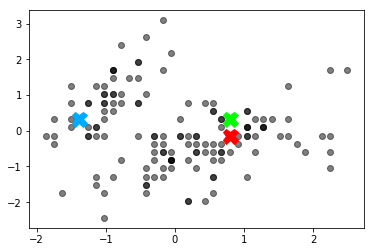

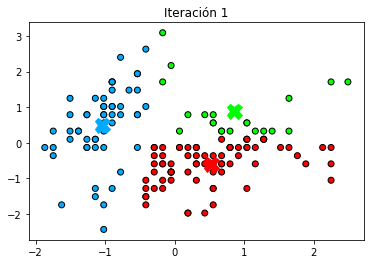

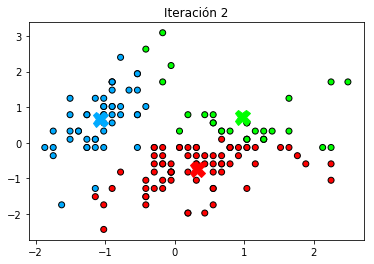

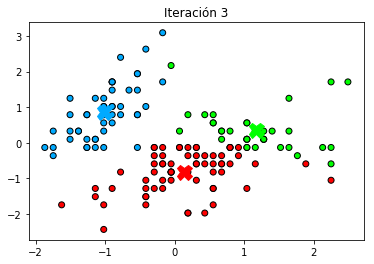

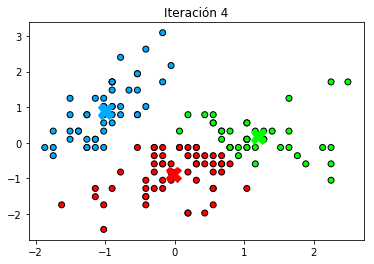

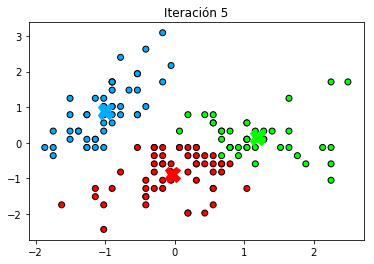

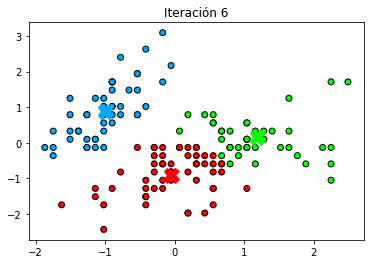

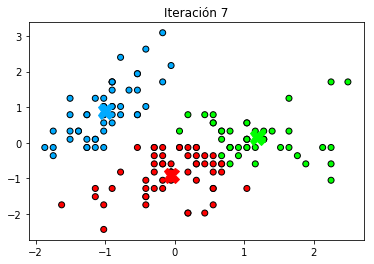

--


In [0]:
n, p = X.shape

def Kmeans(x1, x2, k, dist, max_iters=20, tolerance = 0.0001):
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T

  # Visualiza la posición de los centroides.
  
  colors = ['#FF0000', '#00FF00','#00AAFF']
  
  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c])

  # Visualiza la nube de datos.
  plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  
  ### COMIENZA AQUÍ TU CÓDIGO ###
  
  plt.show()
  
  cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

  points = np.c_[x1[:, 0], x2[:, 0]]
  
  distance_check = [0, 0, 0]
  
  for iteration in range(max_iters):
    clusters = []
    for point in points:
      distances = []
      for center in centr:
        distances.append(get_distance(point, center))
      clusters.append(np.argmin(np.array(distances)))

    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap=cmap_bold, edgecolor="k")

  #   print(clusters)

  #   print(centr)
  

    for i, _ in enumerate(centr):      
      if (get_distance(centr[i], updateCenter(points[np.array(clusters)==i])) < tolerance):
        distance_check[i] = 1
      else:
        distance_check[i] = 0
      centr[i] = updateCenter(points[np.array(clusters)==i])
      plt.plot(centr[i, 0], centr[i, 1], marker="X", markersize=15, c=colors[i])
    
    plt.title("Iteración {}".format(iteration+1))
    plt.show()
    
    if (np.mean(distance_check) == 1):
      return centr, np.zeros((n, 1)), iteration
        
    
  return centr, np.zeros((n, 1)), max_iters  ## <-- Sustituye esto por el resultado de tu función.
  
# ----------------------- #  


# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Probamos la función:
Kmeans(X[:, 0:1], X[:, 1:2], 3, dist)

print("--")

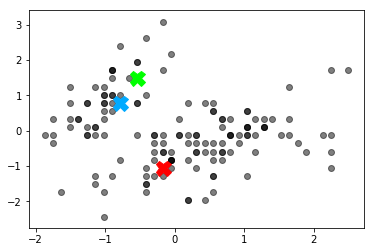

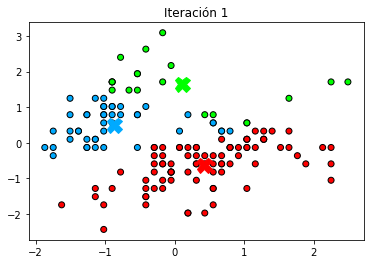

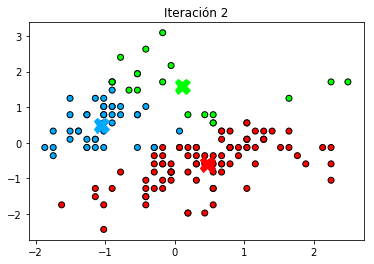

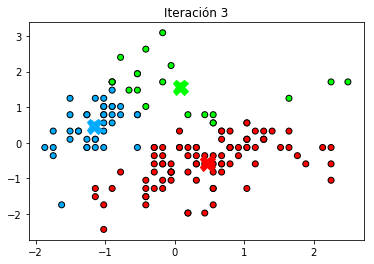

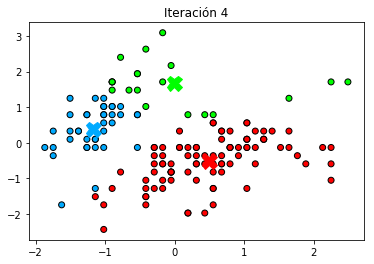

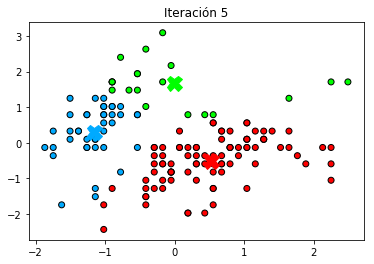

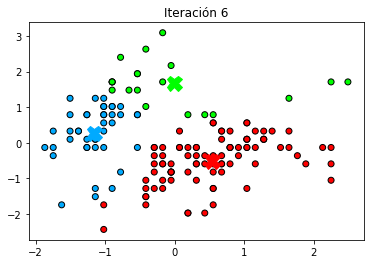

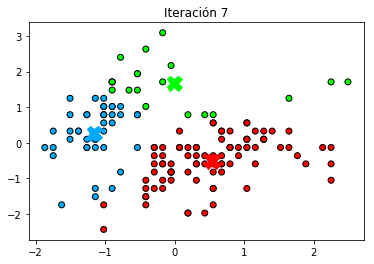

--


In [0]:
n, p = X.shape

def Kmeans_gif(x1, x2, k, dist, max_iters=20, tolerance = 0.0001):
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  ic    = [np.random.choice(x1.shape[0]) for i in range(k)]
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T

  # Visualiza la posición de los centroides.
  
  colors = ['#FF0000', '#00FF00','#00AAFF']
  
  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c])

  # Visualiza la nube de datos.
  plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  
  ### COMIENZA AQUÍ TU CÓDIGO ###
  
  plt.show()
  
  cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

  points = np.c_[x1[:, 0], x2[:, 0]]
  
  distance_check = [0, 0, 0]
  
  for iteration in range(max_iters):
    fig, ax = plt.subplots()
    clusters = []
    for point in points:
      distances = []
      for center in centr:
        distances.append(get_distance(point, center))
      clusters.append(np.argmin(np.array(distances)))

    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap=cmap_bold, edgecolor="k")

  #   print(clusters)

  #   print(centr)
  

    for i, _ in enumerate(centr):      
      if (get_distance(centr[i], updateCenter(points[np.array(clusters)==i])) < tolerance):
        distance_check[i] = 1
      else:
        distance_check[i] = 0
      centr[i] = updateCenter(points[np.array(clusters)==i])
      ax.plot(centr[i, 0], centr[i, 1], marker="X", markersize=15, c=colors[i])
    
    plt.title("Iteración {}".format(iteration+1))
    plt.show()
    
    if (np.mean(distance_check) == 1):
      return centr, np.zeros((n, 1)), iteration
        
    
  return centr, np.zeros((n, 1)), max_iters  ## <-- Sustituye esto por el resultado de tu función.
  
# ----------------------- #  

def update(i):
  return 0, axes[i]

# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Probamos la función:
centr, wtf, iters = Kmeans(X[:, 0:1], X[:, 1:2], 3, dist)

plt.show()

print("--")

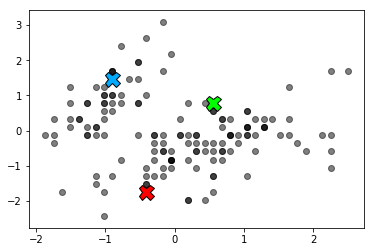

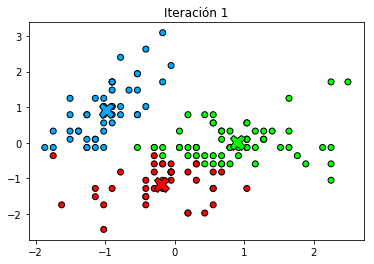

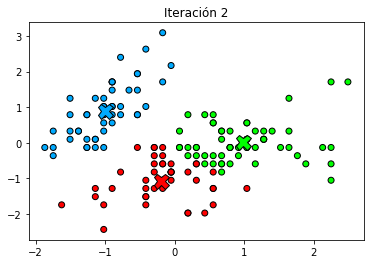

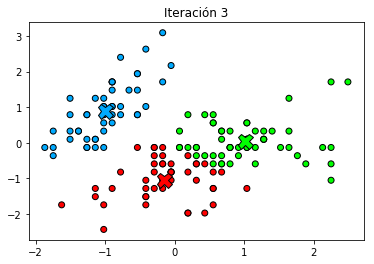

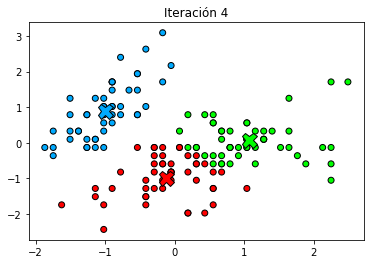

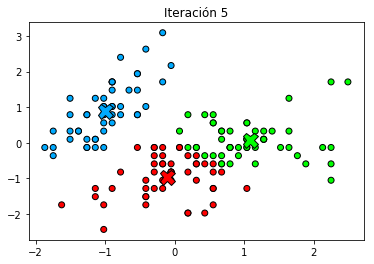

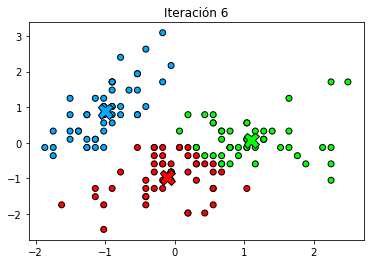

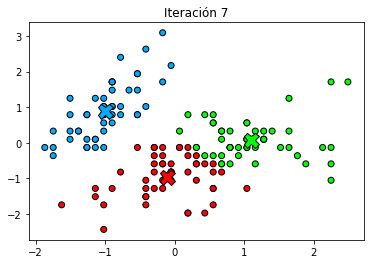

--


In [0]:
n, p = X.shape

fig, ax = plt.subplots()

cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

colors = ['#FF0000', '#00FF00','#00AAFF']



def Kmeans_plus_plus(x1, x2, k, dist, max_iters=20, tolerance = 0.0001):
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.
  
  
  points = np.c_[x1[:, 0], x2[:, 0]]
  
  centroid_index = np.random.choice(x1.shape[0])
  
  ic = [centroid_index]
  
  rest_points = np.delete(points, centroid_index)
  
  while len(ic) < k:
    probs = np.zeros(points.shape[0])
    
    for ic_point in ic:
      probs = probs + np.array([np.power(get_distance(points[ic_point], point), 2) for point in points])
    
    
    probs = probs / np.sum(probs)
    
    centroid_index = np.random.choice(x1.shape[0], p=probs)
    
    rest_points = np.delete(rest_points, centroid_index)
    
    ic.append(centroid_index)
    
  centr = np.array([x1[ic, 0], x2[ic, 0]]).T

  # Visualiza la posición de los centroides. 
  
  for c in range(k):
    plt.plot(centr[c, 0], centr[c, 1], marker="X", markersize=15, c=colors[c], markeredgecolor="K")

  # Visualiza la nube de datos.
  plt.scatter(x1[:, 0],  x2[:,  0], color="black", alpha=0.5)
  
  ### COMIENZA AQUÍ TU CÓDIGO ###
  
  plt.show()
  
  distance_check = [0, 0, 0]

  
  for iteration in np.arange(max_iters):
    clusters = []
    for point in points:
      distances = []
      for center in centr:
        distances.append(get_distance(point, center))
      clusters.append(np.argmin(np.array(distances)))

    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap=cmap_bold, edgecolor="k")

    for i, _ in enumerate(centr):
      if (get_distance(centr[i], updateCenter(points[np.array(clusters)==i])) < tolerance):
        distance_check[i] = 1
      else:
        distance_check[i] = 0
      centr[i] = updateCenter(points[np.array(clusters)==i])
      plt.plot(centr[i, 0], centr[i, 1], marker="X", markersize=15, c=colors[i], markeredgecolor="K")

    plt.title("Iteración {}".format(iteration+1))
  
    plt.show()
    
    if (np.mean(distance_check) == 1):
      return centr, np.zeros((n, 1)), iteration
     
  return centr, np.zeros((n, 1)), max_iters  ## <-- Sustituye esto por el resultado de tu función.
  
# ----------------------- #  


# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Probamos la función:
Kmeans_plus_plus(X[:, 0:1], X[:, 1:2], 3, dist)

print("--")

--


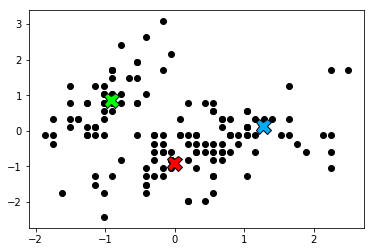

In [0]:
n, p = X.shape

fig, ax = plt.subplots()

cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

colors = ['#FF0000', '#00FF00','#00AAFF']

from sklearn.cluster import KMeans



def Kmeans_sklearn(x1, x2, k, dist, max_iters=20, tolerance = 0.0001):
  
  # Estandariza las variables.
  x1 = scale(x1, with_mean=True, with_std=True)
  x2 = scale(x2, with_mean=True, with_std=True)

  # Inicialización aleatoria de los centroides.  
  
  points = np.c_[x1[:, 0], x2[:, 0]]
  
  model = KMeans(n_clusters=3, n_init=1, max_iter=1, init="random").fit(points)
  
  centr = model.cluster_centers_
  
  plt.scatter(points[:, 0], points[:, 1], c="K", cmap=cmap_bold, edgecolor="k")
  
  cont = 0
  
  for cent in centr:
    plt.plot(cent[0], cent[1], marker="X", markersize=15, c=colors[cont], markeredgecolor="K")
    cont += 1
  
  
  
# ----------------------- #  


# Función de distancia Euclidea entre dos puntos.
dist = lambda a, b: np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# Probamos la función:
Kmeans_sklearn(X[:, 0:1], X[:, 1:2], 3, dist)

print("--")

In [0]:
# print(updateCenter(np.array([[2, 0], [1, 2], [3, 2], [4, 0]])))
b = np.array([2, 2, 1, 3])

a = np.array([[2, 0], [1, 2], [3, 2], [4, 0]])
print(a[b==2])

[[2 0]
 [1 2]]
